### Short notebook with basic choropleth maps made using Plotly.

In [336]:
#!pip install chart-studio
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go

In [337]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [338]:
init_notebook_mode(connected=True)

# US Agricultural Exports by State

In [340]:
agri_df = pd.read_csv('2011_US_AGRI_Exports')

In [341]:
agri_df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


In [396]:
data = dict(type='choropleth',
            colorscale = 'deep',
            locations = agri_df['code'],
            locationmode = 'USA-states',
            z = agri_df['total exports'],
            text = agri_df['text'],
            marker = dict(line = dict(color = 'rgb(40,40,40)', width=1)), 
            colorbar = {'title':'Millions USD'})

In [398]:
layout = dict(title = '2011 US Agriculture Exports by State', 
              geo = dict(scope='usa', showlakes=True, lakecolor='rgb(85,173,240)'),
             autosize=False,
             width = 1000,
             height = 800)

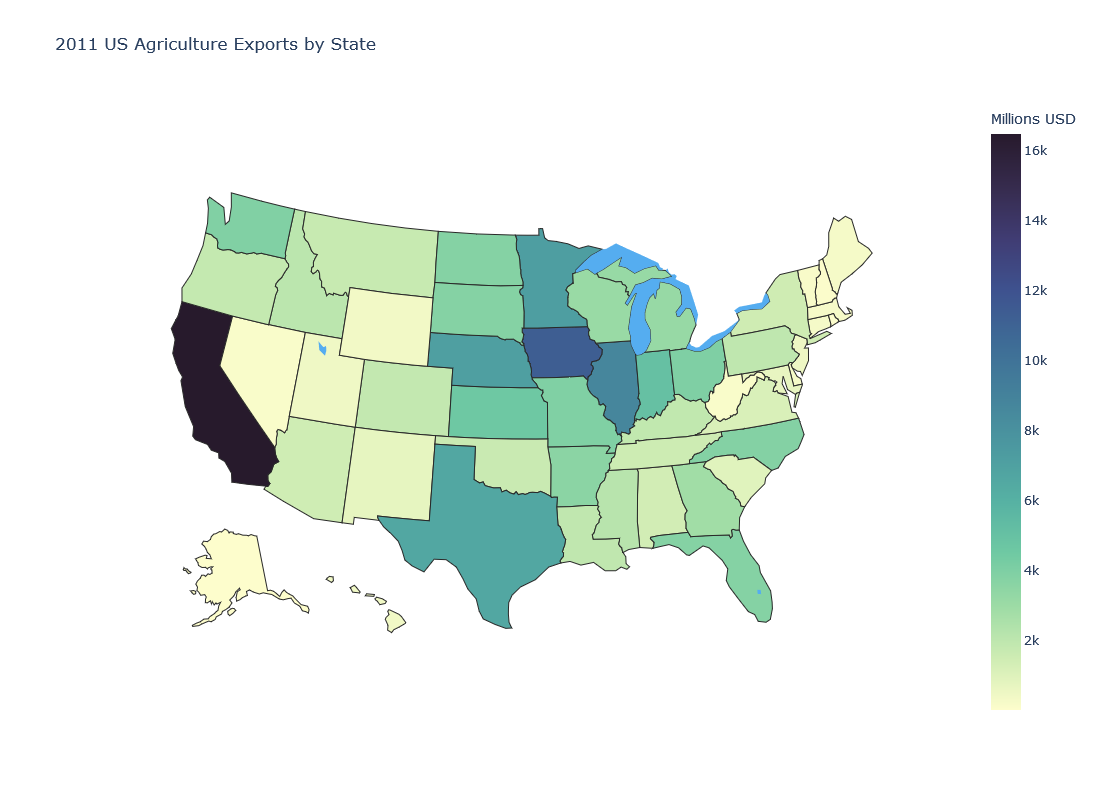

In [400]:
choromap_agri = go.Figure(data = [data], layout = layout)
iplot(choromap_agri)

In [345]:
## Used for full-screen browser view of the figure
# choromap2.update_layout(autosize=True)
# choromap2.show(renderer='browser')

# 2014 World GDP

In [347]:
gdp_df = pd.read_csv('2014_World_GDP')

In [348]:
gdp_df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [426]:
world_data = dict(type = 'choropleth',
                  locations = gdp_df['CODE'],
                  z = gdp_df['GDP (BILLIONS)'],
                  text = gdp_df['COUNTRY'],
                  colorbar = {'title':'GDP in Billions USD'},
                 colorscale = 'turbo')

In [428]:
layout = dict(title= '2014 Global GDP',
              geo = dict(showframe = False,
                         projection = {'type':'natural earth'}),
             autosize=False,
             width = 1000,
             height = 800)

In [430]:
choromap_world = go.Figure(data = [world_data], layout = layout)

# choromap_world.update_layout(autosize=True)
# choromap_world.show(renderer='browser')

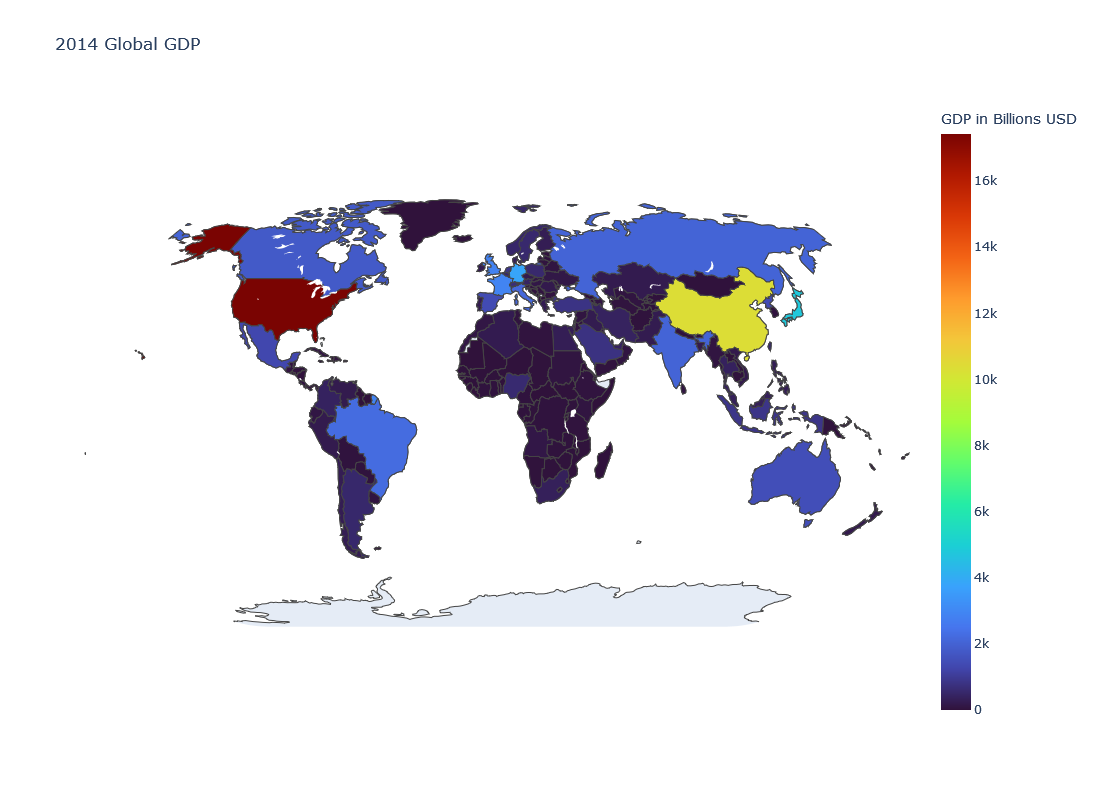

In [432]:
iplot(choromap_world)

# 2014 World Power Consumption

In [354]:
pwr_df = pd.read_csv('2014_World_Power_Consumption')
pwr_df.head()

,Country,Power Consumption KWH,Text
0,China,5.523000e+12,"China 5,523,000,000,000"
1,United States,3.832000e+12,"United 3,832,000,000,000"
2,European,2.771000e+12,"European 2,771,000,000,000"
3,Russia,1.065000e+12,"Russia 1,065,000,000,000"
4,Japan,9.210000e+11,"Japan 921,000,000,000"


In [355]:
data = dict(type = 'choropleth',
                  locations = pwr_df['Country'],
                  z = pwr_df['Power Consumption KWH'],
                  locationmode = 'country names',
                  text = pwr_df['Text'],
                  colorbar = {'title':'World Power Consumption (in KWH)'},
                 colorscale = 'thermal')

In [356]:
layout = dict(title= 'World Power Consumption KWH',
              geo = dict(showframe = False,
                         projection = {'type':'mercator'}),
             autosize=False,
             width = 1000,
             height = 800)

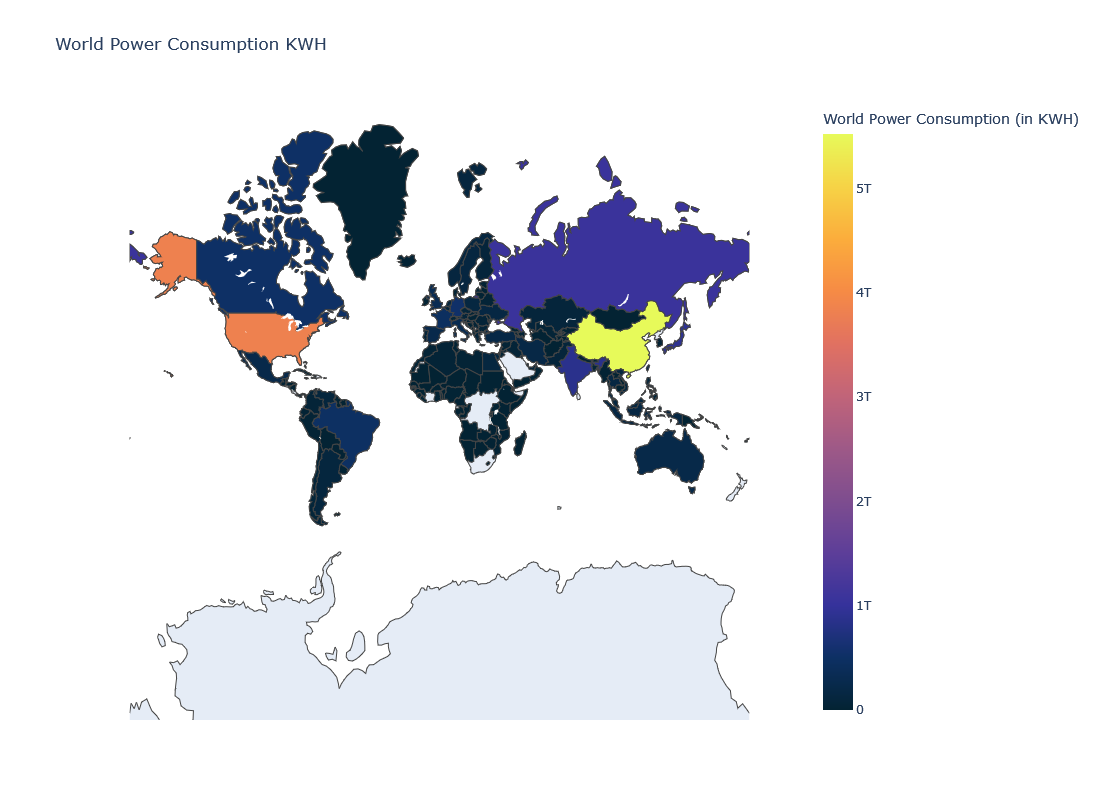

In [357]:
power_choromap = go.Figure(data = [data],layout = layout)
# choromap.update_layout(autosize=True)
# choromap.show(renderer='browser')
iplot(power_choromap)